## UTS_MESIN B_202131093_DIMAS ABI MESTI_KLASIFIKASI DECISION TREE

In [46]:
##import library yang diperlukan untuk memproses data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [47]:
## memanggil dan membaca csv 'K01_heart_disease.csv'
data = pd.read_csv("K01_heart_disease.csv")
data

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [51]:
#mempreprocessing data dengan pelabelan data encoder, atau tahap preprocessing data, dengan memasukkan semua atribut yang diperlukan dan mentransformasikannya
## dan membuat data yang bisa diproses dan menjadi tipe data yang satu
from sklearn.preprocessing import LabelEncoder
for col in ['Age','Sex','ChestPainType','RestingBP','Cholesterol','FastingBS','RestingECG','MaxHR','ExerciseAngina','Oldpeak','ST_Slope','HeartDisease']:
    le =LabelEncoder()
    data[col]=le.fit_transform(data[col])
    data
    print(data['Age'],data['Sex'],data['ChestPainType'],data['RestingBP'],data['Cholesterol'],data['FastingBS'],data['RestingECG'],data['MaxHR'],data['ExerciseAngina'],data['Oldpeak'],data['ST_Slope'],data['HeartDisease'])

0      12
1      21
2       9
3      20
4      26
       ..
913    17
914    40
915    29
916    29
917    10
Name: Age, Length: 918, dtype: int64 0      1
1      0
2      1
3      0
4      1
      ..
913    1
914    1
915    1
916    0
917    1
Name: Sex, Length: 918, dtype: int32 0      1
1      2
2      1
3      0
4      2
      ..
913    3
914    0
915    0
916    1
917    2
Name: ChestPainType, Length: 918, dtype: int32 0      41
1      55
2      31
3      39
4      49
       ..
913    14
914    45
915    31
916    31
917    39
Name: RestingBP, Length: 918, dtype: int64 0      147
1       40
2      141
3       72
4       53
      ... 
913    122
914     51
915      9
916     94
917     35
Name: Cholesterol, Length: 918, dtype: int64 0      0
1      0
2      0
3      0
4      0
      ..
913    0
914    1
915    0
916    0
917    0
Name: FastingBS, Length: 918, dtype: int64 0      1
1      1
2      2
3      1
4      1
      ..
913    1
914    1
915    1
916    0
917    1
Name: Resti

In [52]:
data.describe()##melihat deskripsi dari dataset

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,25.510893,0.789760,0.781046,32.899782,81.640523,0.233115,0.989107,62.979303,0.404139,18.787582,1.361656,0.553377
std,9.432617,0.407701,0.956519,14.098608,58.742803,0.423046,0.631671,24.919644,0.490992,10.077647,0.607056,0.497414
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,1.000000,0.000000,22.000000,33.250000,0.000000,1.000000,46.000000,0.000000,10.000000,1.000000,0.000000
50%,26.000000,1.000000,0.000000,31.000000,81.000000,0.000000,1.000000,64.000000,0.000000,16.000000,1.000000,1.000000
75%,32.000000,1.000000,2.000000,41.000000,125.000000,0.000000,1.000000,82.000000,1.000000,25.000000,2.000000,1.000000
max,49.000000,1.000000,3.000000,66.000000,221.000000,1.000000,2.000000,118.000000,1.000000,52.000000,2.000000,1.000000


In [53]:
data.info()##melihat informasi yang tertera pada dataset, sebelum itu tipe datanya masih berbeda, tetapi ketika di preprocessing data berubah menjadi bertipe integer 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Age             918 non-null    int64
 1   Sex             918 non-null    int64
 2   ChestPainType   918 non-null    int64
 3   RestingBP       918 non-null    int64
 4   Cholesterol     918 non-null    int64
 5   FastingBS       918 non-null    int64
 6   RestingECG      918 non-null    int64
 7   MaxHR           918 non-null    int64
 8   ExerciseAngina  918 non-null    int64
 9   Oldpeak         918 non-null    int64
 10  ST_Slope        918 non-null    int64
 11  HeartDisease    918 non-null    int64
dtypes: int64(12)
memory usage: 86.2 KB


In [54]:
## Menghilangkan kolom HeartDisease x dan memasukkan HeartDisease ke dalam y
x=data.drop('HeartDisease',axis=1)
y=data['HeartDisease']

In [55]:
## mensplitting data menjadi data latih dan data testing dengan perbandingan 80:20
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [56]:
## membuat model data baru dengan menggunakan algoritma DecisionTree
from sklearn.tree import DecisionTreeClassifier
modelDT=DecisionTreeClassifier()
modelDT.fit(x_train,y_train)

DecisionTreeClassifier()

In [57]:
##memprediksi Decision tree dari modelDT data testing x
predict_DT=modelDT.predict(x_test)

In [58]:
##mengkalkulasikan hasil akurasi menggunakan accuracy_score dengan acuan y_test,predict_DT *100 untuk mendapatkan hasil akurasi skornya
from sklearn.metrics import accuracy_score
print("Akurasi Scorenya Sebesar : ", accuracy_score(y_test,predict_DT)*100)

Akurasi Scorenya Sebesar :  76.08695652173914


In [59]:
#menampilkan 5 data teratas
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,12,1,1,41,147,0,1,98,0,10,2,0
1,21,0,2,55,40,0,1,82,0,20,1,1
2,9,1,1,31,141,0,2,25,0,10,2,0
3,20,0,0,39,72,0,1,34,1,25,1,1
4,26,1,2,49,53,0,1,48,0,10,2,0


In [60]:
## membuat data testing baru untuk diuji
xbaruDT=([[21,0,2,55,40,0,1,82,0,20,1]])

In [61]:
## memprediksi data testing baru diatas jika 1 = yes jika 0 =no 
prediksibarudt=modelDT.predict(xbaruDT)
print('Prediksi Data : ',('Yes' if prediksibarudt == 1 else 'No'))

Prediksi Data :  Yes


C:\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


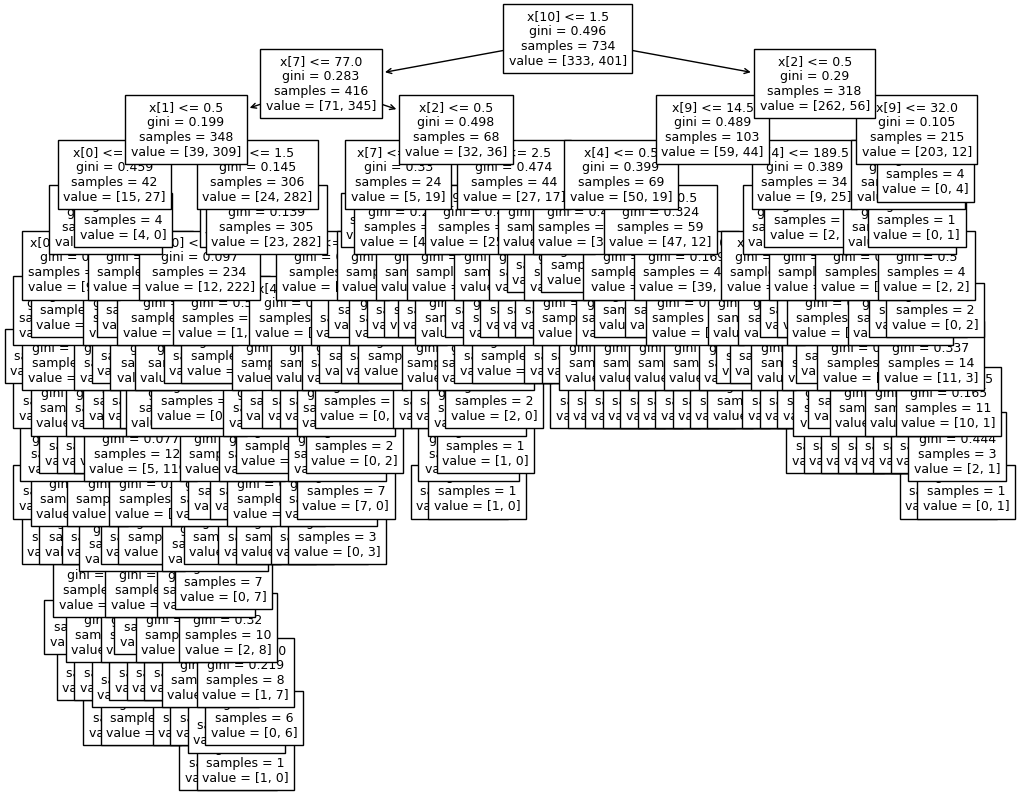

In [62]:
## membuat visualisasi data algoritma decisiontree dari plot_tree
from sklearn.tree import plot_tree
plt.subplots(figsize=(12,10))
plot_tree(modelDT,fontsize=9)
plt.show()